- PyTorch提供了很多数据集
    - MNIST
    - Fashion-MNIST
    - KMNIST
    - EMNIST
    - QMNIST
    - FakeData
    - COCO
    - LSUN
    - ImageFolder
    - DatasetFolder
    - ImageNet
    - CIFAR
    - STL10
    - SVHN
    - PhotoTour
    - SBU
    - Flickr
    - VOC
    - Cityscapes
    - SBD
    - USPS
    - Kinetics-400
    - HMDB51
    - UCF101

# MNIST数据集

## MNIST类说明

```python
CLASS torchvision.datasets.MNIST(
    root,                                # 数据集的存放目录
    train=True,                          # True表示加载Train数据集，否则加载Test数据集
    transform=None,                      # 变换函数，用来对数据特征进行变换处理
    target_transform=None,               # 变换函数，用来对数据特征进行变换处理
    download=False)                      # True表示从互联网下载数据集到root，否则认为已经下载，直接从root读取(下载的时候，下载全部数据集)
```

In [1]:
from torchvision.datasets import MNIST

ds_mnist = MNIST(root="./datasets", download=True)
print(type(ds_mnist))

100.1%

Extracting ./datasets\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets\MNIST\raw


113.5%

Extracting ./datasets\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets\MNIST\raw


100.4%

Extracting ./datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets\MNIST\raw


180.4%

Extracting ./datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets\MNIST\raw
Processing...
Done!
<class 'torchvision.datasets.mnist.MNIST'>


## MNIST类使用

1. 所有的数据集类型都是DataSet类型
    - `torch.utils.data.Dataset`
    - 数据集分成两类：
        - map-style datasets,
            - torch.utils.data.Dataset
        - iterable-style datasets.
            - torch.utils.data.IterableDataset

- MNIST属于map-style datasets

In [6]:
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, IterableDataset
ds_mnist = MNIST(root="./datasets", download=False)
if isinstance(ds_mnist, Dataset) :
    print("是Map数据集")

if isinstance(ds_mnist, IterableDataset) :   
    print("是Iterable数据集")
else:
    print("不是迭代数据集")

是Map数据集
不是迭代数据集


2. MNIST的集成结构是：
    - MNIST
       - |   -torchvision.datasets.vision.VisionDataset
       - |   -torch.utils.data.dataset.Dataset
       - |   -builtins.object

3. MNIST是Map-Style的数据集
    - 数据遍历方式：
        1. 取长度：`__len__(self)`
        2. 根据下标获取元素：`__getitem__(self, index)`

60000
10000
<class 'tuple'>


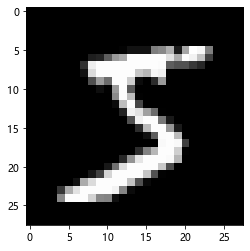

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
train_mnist = MNIST(root="./datasets", train=True, download=False)
print(len(train_mnist))
test_mnist = MNIST(root="./datasets", train=False, download=False)
print(len(test_mnist))
print(type(train_mnist[0]))
plt.imshow(train_mnist[0][0], cmap='gray')

4. 数据的属性:
    - 与数据有关的属性
        1. class_to_idx
        2. processed_folder
        3. raw_folder
        4. test_data
        5. test_labels
        6. train_data
        7. train_labels
    - 与资源有关的属性
        1. classes = `['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', ...`
        2. resources = `[('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyt...`
        3. test_file = 'test.pt'
        4. training_file = 'training.pt'

In [11]:
from torchvision.datasets import MNIST
test_mnist = MNIST(root="./datasets", train=False, download=False)
print(test_mnist.class_to_idx)
print(test_mnist.processed_folder)
print(test_mnist.raw_folder)
print(test_mnist.test_data.shape)
print(test_mnist.test_labels.shape)
print(test_mnist.train_data.shape)
print(test_mnist.train_labels.shape)
print(test_mnist.classes)
print(test_mnist.resources)
print(test_mnist.test_file)
print(test_mnist.training_file)


{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}
./datasets\MNIST\processed
./datasets\MNIST\raw
torch.Size([10000, 28, 28])
torch.Size([10000])
torch.Size([10000, 28, 28])
torch.Size([10000])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
[('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'f68b3c2dcbeaaa9fbdd348bbdeb94873'), ('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'd53e105ee54ea40749a09fcbcd1e9432'), ('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', '9fb629c4189551a2d022fa330f9573f3'), ('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 'ec29112dd5afa0611ce80d1b7f02629c')]
test.pt
training.pt


In [2]:
help(ds_mnist)

Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/processed/training.pt``
 |          and  ``MNIST/processed/test.pt`` exist.
 |      train (bool, optional): If True, creates dataset from ``training.pt``,
 |          otherwise from ``test.pt``.
 |      download (bool, optional): If true, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |  
 |  Method resolution order:
 |      MNIST
 |      torchv

# Map样式-Dataset类型

## Dataset抽象类

- 支持`__add__操作`:`+`
- 支持`__getitem__`操作：`[]`

In [20]:
from torch.utils.data import Dataset
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(builtins.object)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __getitem__(self, index)
 |  
 |  -------------------------------------------------

## `+`操作

- 数据集的合并操作
    - 支持`__add__`运算`+`
    - 返回的类型是：ConcatDataset

In [21]:
from torchvision.datasets import MNIST
train_mnist = MNIST(root="./datasets", train=True, download=False)
test_mnist = MNIST(root="./datasets", train=False, download=False)
data = train_mnist + test_mnist
print(type(data), len(data))


<class 'torch.utils.data.dataset.ConcatDataset'> 70000


## ConcatDataset类

- 提供使用列表形式提供数据合并。（构造模式）
- 提供静态函数：cumsum(sequence)（工厂模式）

1. 使用序列合并数据集

In [22]:
from torchvision.datasets import MNIST
train_mnist = MNIST(root="./datasets", train=True, download=False)
test_mnist = MNIST(root="./datasets", train=False, download=False)
data = train_mnist + test_mnist

# 可是使用构造器构造
from torch.utils.data.dataset import ConcatDataset
all_data = ConcatDataset([train_mnist, test_mnist])
print(type(all_data), len(all_data))

help(data)

<class 'torch.utils.data.dataset.ConcatDataset'> 70000
Help on ConcatDataset in module torch.utils.data.dataset object:

class ConcatDataset(Dataset)
 |  Dataset as a concatenation of multiple datasets.
 |  
 |  This class is useful to assemble different existing datasets.
 |  
 |  Arguments:
 |      datasets (sequence): List of datasets to be concatenated
 |  
 |  Method resolution order:
 |      ConcatDataset
 |      Dataset
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, idx)
 |  
 |  __init__(self, datasets)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  cumsum(sequence)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  cummulative_sizes
 |  
 |  ----------------------------------------------------------------

2. cumsum函数与cumulative_sizes属性
    - cummulative_sizes名字已经改成cumulative_sizes

In [35]:
from torchvision.datasets import MNIST
from torch.utils.data.dataset import ConcatDataset

train_mnist = MNIST(root="./datasets", train=True, download=False)
test_mnist = MNIST(root="./datasets", train=False, download=False)
all_data = ConcatDataset([train_mnist, test_mnist])
print(all_data.cumulative_sizes)
# ----------------------------------
list_sum = ConcatDataset.cumsum([train_mnist , test_mnist])
print(list_sum)

[60000, 70000]
[60000, 70000]


# Iterable样式-IterableDataset类

- 提供`__iter__(self)`实现的类。
- 提供`__add__(self, other)`实现数据添加

- 这个类是规范类，用户集成用来实现自己的可迭代数据集。
    - 这个类的规范在于可以被DataLoader访问使用。

In [43]:
from torch.utils.data import IterableDataset
class RangeDataset(IterableDataset):
    def __init__(self, start, end):
        self.start=start
        self.end=end
    def __iter__(self):
        return iter(range(self.start, self.end))

ds_range = RangeDataset(1,5)
lst = [x for x in ds_range]
print(lst)

print(list(ds_range))
print(enumerate(ds_range))

[1, 2, 3, 4]
[1, 2, 3, 4]


# DataLoader与Dataset

## DataLoader 类说明

- DataLoader作用
    - 主要用来对数据集进行分配，DataLoader的工作是基于Dataset与IterableDataset的。

```python
CLASStorch.utils.data.DataLoader(
    dataset,                         # 需要分匹配的数据集
    batch_size=1,                    # 范培的批次大小
    shuffle=False,                   # 是否洗牌
    sampler=None,                    # 设置采样器
    batch_sampler=None,              # 批次采样器
    num_workers=0,                   # 数据处理的子进程任务数
    collate_fn=None,                 # 合并子进程数据的协作函数
    pin_memory=False,                # 拷贝数据到CUDA
    drop_last=False,                 # 是否丢弃不足批次数的
    timeout=0,                       # 设置加载时间（0：加载到完成为止）
    worker_init_fn=None,             # 一个回调函数，在worker数据前后后调用。
    multiprocessing_context=None)    # 进程上下文，一般情况设置为None，表示使用默认当前进程的上下文。
```

In [3]:
from torch.utils.data import DataLoader
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(builtins.object)
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler, optional): defines the strategy to draw samples from
 |          the dataset. If specified, :attr:`shuffle` must be ``False``.
 |      batch_s

## 常规使用

- 常规使用主要是如下几个常用的参数：
    1. dataset必须的
    2. batch_size批次数据个数
    3. shuffle是否洗牌打乱（随机洗牌）
    4. drop_last是否丢弃剩余不足一个批次的数据。

- 使用模式：
    - 迭代获取数据，获取的数据是Tensor类型。

- 例子1：迭代数据集
    - 迭代数据集只有一个循环元素。

In [45]:
from torch.utils.data import IterableDataset
from torch.utils.data import DataLoader

class RangeDataset(IterableDataset):
    def __init__(self, start, end):
        self.start=start
        self.end=end
    def __iter__(self):
        return iter(range(self.start, self.end))

ds_range = RangeDataset(1,5)

loader = DataLoader(ds_range)
for item in loader:
    print(item)

tensor([1])
tensor([2])
tensor([3])
tensor([4])


- 例子2：map数据集
    - 循环的是一个大小为2的元祖。

- 注意：
    - MNIST的数据加载时PIL.Image.Image类型，需要使用函数转换下，这里先使用把Image转换为Tensor的函数ToTensor

In [49]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
train_mnist = MNIST(root="./datasets", train=True, download=False,transform=ToTensor())

loader = DataLoader(train_mnist, batch_size=10000, shuffle=True, drop_last=False)
for d, t in loader:    # 数据与标签
    print(d.shape, t.shape)

torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])


## 采样器的使用

- PyTorch提供了抽象类Sampler实现数据采样，实现用户定制的迭代返回数据。
    - 该类提供两个接口函数，实现数据处理的规范：
        1. `__iter__()`
            - 返回数据集索引的迭代器。
        2. `__len__()`
            - 返回迭代器的个数。

### 数据采样器参数sampler

1. 定义一个采样器
    - sampler采样器返回的必须是整数迭代器。
    - `__len__`在这里没有作用。

In [76]:
from torch.utils.data import Sampler

class MySampler(Sampler):
    def __init__(self):
        pass
    def __iter__(self):
        return iter(range(0,4))
    
    def __len__(self):
        return None

2. 使用采样器
    - 采样器sampler参数与shuffle参数矛盾的。
    - smapler负责从原数据集获取数据。（默认是全部采样）

In [79]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

test_mnist = MNIST(root="./datasets", train=False, download=False)

sampler = MySampler()
loader = DataLoader(train_mnist, sampler=sampler, batch_size=100, drop_last=False)
for d, t in loader:
    print(d.shape, t.shape)
print("-------------------------------")
loader = DataLoader(train_mnist, sampler=sampler, batch_size=2, drop_last=False)
for d, t in loader:
    print(d.shape, t.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])
-------------------------------
torch.Size([2, 1, 28, 28]) torch.Size([2])
torch.Size([2, 1, 28, 28]) torch.Size([2])


### 批次采样器batch_sampler参数

1. 定义批次采样器
    - 返回的迭代器的迭代器。

In [90]:
from torch.utils.data import Sampler

class MyBatchSampler(Sampler):
    def __init__(self):
        pass
    def __iter__(self):
        return iter([iter(range(0,4)), iter(range(4,10))])  # 使用生成器也行。
    
    def __len__(self):
        return None

2. 使用批次采样器
    - 批次采样器参数与下面的参数矛盾，不能同时使用。
    - batch_size, shuffle, sampler, and drop_last

In [91]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

test_mnist = MNIST(root="./datasets", train=False, download=False)

sampler = MyBatchSampler()
loader = DataLoader(train_mnist, batch_sampler=sampler)
for d, t in loader:
    print(d.shape, t.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])
torch.Size([6, 1, 28, 28]) torch.Size([6])


### 其他采样器

- PyTorch为了规范采样器，提供了分类接口
    1. SequentialSampler：序列采样
    2. RandomSampler：随机采样
    3. SubsetRandomSampler：子集随机采样
    4. WeightedRandomSampler：权重随机采样
    5. BatchSampler：批次采样
    6. DistributedSampler：分布式采样

In [93]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data import SequentialSampler
from torch.utils.data import RandomSampler
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import BatchSampler
from torch.utils.data import DistributedSampler

test_mnist = MNIST(root="./datasets", train=False, download=False)


1. SequentialSampler采样器的例子
    - 注意构造器需要一个数据集，这个数据集主要取他长度形成顺序采样器。顺序是从0，1，2，....开始的，长度与数据集一样。
    - 构造器：
        - `__init__(self, data_source)`

In [97]:
ds = [1,3,10]
s_sampler = SequentialSampler(ds)   # 使用ds的len作为访问顺序
for x in s_sampler:
    print(x)
print("------------------------")
loader = DataLoader(train_mnist, sampler=s_sampler, batch_size=100, drop_last=False)   # 采样前3个。不是采样1，3，10位置上的数据哈
for d, t in loader:
    print(d.shape, t.shape)

0
1
2
torch.Size([3, 1, 28, 28]) torch.Size([3])


- 实现代码：

```python
    def __iter__(self):
        return iter(range(len(self.data_source)))

    def __len__(self):
        return len(self.data_source)
    
```

2. RandomSampler
    - 构造器：`__init__(self, data_source, replacement=False, num_samples=None)`
        - data_source：数据集；这样产生的随机数不会查过数据集的个数值。
        - replacement=True：使用num_samples作为采样个数，false使用数据集长度作为采样个数
        - num_samples在replacement=True使用。replacement=False该参数没有意义,还会抛出异常。

- 实现代码：

```python
    @property
    def num_samples(self):
        # dataset size might change at runtime
        if self._num_samples is None:
            return len(self.data_source)
        return self._num_samples

    def __iter__(self):
        n = len(self.data_source)
        if self.replacement:
            return iter(torch.randint(high=n, size=(self.num_samples,), dtype=torch.int64).tolist())
        return iter(torch.randperm(n).tolist())

    def __len__(self):
        return self.num_samples

```

- 使用代码
    - 返回的随机序列值不会超过数据集的长度值。

In [105]:
ds = [1,3,10]    # 下面产生的随机数，在[ 0，len（ds）)范围内
r_sampler = RandomSampler(ds, replacement=True, num_samples=10)   # replacement=True的使用
r_sampler = RandomSampler(ds, replacement=False)   # 使用ds的len作为访问顺序
for x in r_sampler:
    print(x)
print("------------------------")    
loader = DataLoader(train_mnist, sampler=r_sampler, batch_size=100, drop_last=False)   # 采样前3个。不是采样1，3，10位置上的数据哈
for d, t in loader:
    print(d.shape, t.shape)

2
0
1
------------------------
torch.Size([3, 1, 28, 28]) torch.Size([3])


3. SubsetRandomSampler采样器
    - indices参数：一个索引序列。（会被打乱） 

- 源代码：
    - 直接手工指定子集的索引，并随机排序

```python


class SubsetRandomSampler(Sampler):
    r"""Samples elements randomly from a given list of indices, without replacement.

    Arguments:
        indices (sequence): a sequence of indices
    """

    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in torch.randperm(len(self.indices)))    # 对下表随机排序，randperm产生随机全排列

    def __len__(self):
        return len(self.indices)
    
```

- 使用例子

In [110]:
ds = [1,3,10, 5000]    
sr_sampler = SubsetRandomSampler(ds)  # 采样下表为1，3，10的数据，并打乱返回
for x in sr_sampler:
    print(x)
print("------------------------")    
loader = DataLoader(train_mnist, sampler=sr_sampler, batch_size=100, drop_last=False)  
for d, t in loader:
    print(d.shape, t.shape)

3
5000
10
1
------------------------
torch.Size([4, 1, 28, 28]) torch.Size([4])


4. WeightedRandomSampler
    - weights (sequence)  : 权重，其和可以不为1。
    - num_samples (int)   ：样本总数
    - replacement (bool): ：放回抽样
True

In [115]:
w = [0.4, 0.8, 0.2, 0.6, 0.9]    # 权重高的其对应的下表抽取的机会高。 注意：抽的下标，权重知识表示抽到的概率
wr_sampler = WeightedRandomSampler(w, 10, True)    # 抽取10个：当最后一个参数为False，则第二个参数要小于等于权重长度
for x in wr_sampler:
    print(x)
print("------------------------")    
loader = DataLoader(train_mnist, sampler=wr_sampler, batch_size=100, drop_last=False)  
for d, t in loader:
    print(d.shape, t.shape)

4
3
4
1
3
3
4
1
4
1
------------------------
torch.Size([10, 1, 28, 28]) torch.Size([10])


- 不放回抽样
    - 注意：抽取的个数必须与权重个数一样或者小。

In [119]:
w = [0.4, 0.8, 0.2, 0.6, 0.9]    # 权重高的其对应的下表抽取的机会高。 注意：抽的下标，权重知识表示抽到的概率
wr_sampler = WeightedRandomSampler(w, 4, False)    # 抽取10个
for x in wr_sampler:
    print(x)
print("------------------------")    
loader = DataLoader(train_mnist, sampler=wr_sampler, batch_size=100, drop_last=False)  
for d, t in loader:
    print(d.shape, t.shape)

3
0
4
1
------------------------
torch.Size([4, 1, 28, 28]) torch.Size([4])


5. BatchSampler
    - 这个用于批次采样器，不用这样本采样器。参数包含：
        - sampler (Sampler) – 产生采样下标集合.
        - batch_size (python:int) – 批次大小.
        - drop_last (bool) - 剩余的不足的是否保留。

In [120]:
w = [0.4, 0.8, 0.2, 0.6, 0.9]   
wr_sampler = WeightedRandomSampler(w, 4, False) 

b_sampler = BatchSampler(wr_sampler, batch_size=3, drop_last=False)

for x in b_sampler:
    print(x)
print("------------------------")    
loader = DataLoader(train_mnist, batch_sampler=b_sampler)  
for d, t in loader:
    print(d.shape, t.shape)
    

[1, 4, 3]
[0]
------------------------
torch.Size([3, 1, 28, 28]) torch.Size([3])
torch.Size([1, 1, 28, 28]) torch.Size([1])


6. DistributedSampler

- 用于分布式训练
    dataset, 
    num_replicas=None,    # 进程数
    rank=None,            # 进程排名 
    shuffle=True
- 因为需要分布式的package，所以这里暂时不演示代码。

## worker的使用

1. 指定num_workers参数，可以启动多进程加载数据集。

In [123]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
train_mnist = MNIST(root="./datasets", train=True, download=False,transform=ToTensor())

loader = DataLoader(train_mnist, batch_size=10000, shuffle=True, drop_last=False, num_workers=2)
for d, t in loader:    # 数据与标签
    print(d.shape, t.shape)

torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])
torch.Size([10000, 1, 28, 28]) torch.Size([10000])


2. worker_init_fn 指定每个进程的处理与初始化
    - 用来设置每个进程的状态；
    - 这个函数会通过参数传递一个pid（进程id）。

In [2]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
train_mnist = MNIST(root="./datasets", train=True, download=False,transform=ToTensor())

def worker_fn(w_id):
    print(F"进程：{w_id}")

loader = DataLoader(train_mnist, batch_size=10000, shuffle=True, drop_last=False, num_workers=3, worker_init_fn=worker_fn)
for d, t in loader:    # 数据与标签
    print(d.shape, t.shape)

RuntimeError: DataLoader worker (pid(s) 13772, 14988, 21548) exited unexpectedly

- 说明：
    - 上面的错误来自平台的缘故：非Window平台才能执行；



- 源代码注释中的说明：
    - Window中不支持SIGCHLD信号，这个是典型的僵尸进程的处理方式。
```python
        # This raises a `RuntimeError` if any worker died expectedly. This error
        # can come from either the SIGCHLD handler in `_utils/signal_handling.py`
        # (only for non-Windows platforms), or the manual check below on errors
        # and timeouts.
        #
```

3. collate_fn协作函数的处理：
    - 这个函数会传递一个batch参数

In [3]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
train_mnist = MNIST(root="./datasets", train=True, download=False,transform=ToTensor())

def collate_fn(batch):
    print("协作:", type(batch))
    return batch

loader = DataLoader(train_mnist, batch_size=10000, shuffle=True, drop_last=False, num_workers=3, collate_fn=collate_fn)
for d, t in loader:    # 数据与标签
    print(d.shape, t.shape)

RuntimeError: DataLoader worker (pid(s) 9988, 13420, 8472) exited unexpectedly

- 这个错误也是因为Window平台的缘故。

------